In [14]:
print("CNN Depth & Filter CIFAR-10 Project")

CNN Depth & Filter CIFAR-10 Project


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers, models

print("NumPy version:", np.__version__)
print("Keras version:", keras.__version__)


NumPy version: 1.26.4
Keras version: 3.4.1


In [16]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print("Training images:", x_train.shape)
print("Training labels:", y_train.shape)
print("Test images:", x_test.shape)
print("Test labels:", y_test.shape)

# Class names for CIFAR-10
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]


Training images: (50000, 32, 32, 3)
Training labels: (50000, 1)
Test images: (10000, 32, 32, 3)
Test labels: (10000, 1)


In [17]:
# Convert pixel values from [0, 255] to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

print("x_train min/max:", x_train.min(), x_train.max())
print("x_test min/max:", x_test.min(), x_test.max())


x_train min/max: 0.0 1.0
x_test min/max: 0.0 1.0


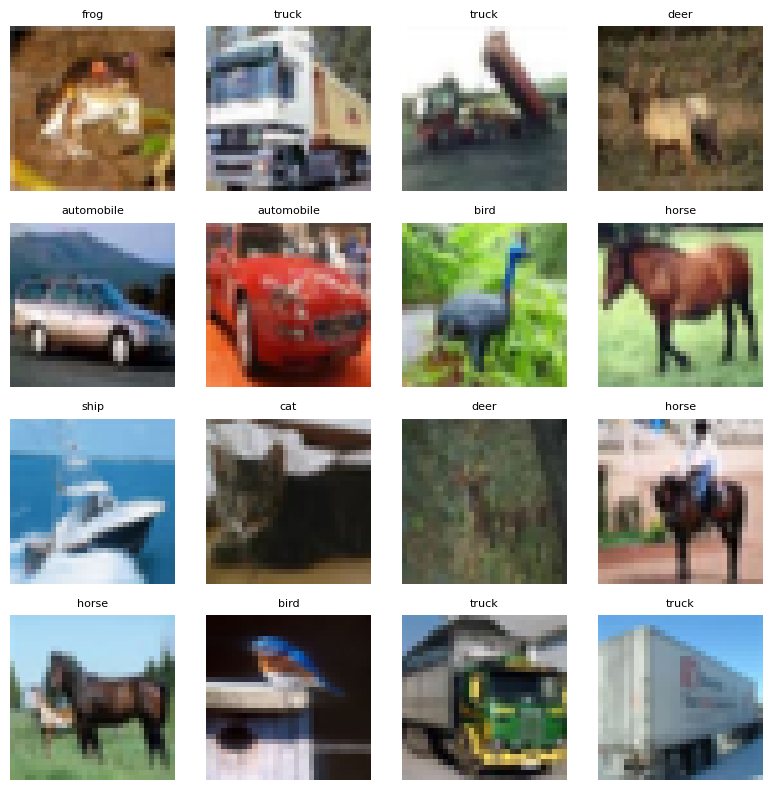

In [18]:
# Show 16 sample training images with their labels (clean version)
plt.figure(figsize=(8, 8))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i])
    label_index = y_train[i][0]   # clean extraction
    plt.title(class_names[label_index], fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [19]:
def build_shallow_cnn(input_shape=(32, 32, 3), num_classes=10):
    # Use an explicit Input layer (recommended in Keras 3)
    model = models.Sequential([
        keras.Input(shape=input_shape),
        layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D((2, 2)),
        
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(num_classes, activation="softmax")
    ])
    
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    return model

shallow_model = build_shallow_cnn()
shallow_model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │         524,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 525,898 (2.01 MB)

 Trainable params: 525,898 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history_shallow = shallow_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3688 - loss: 1.7567 - val_accuracy: 0.5481 - val_loss: 1.3021
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5646 - loss: 1.2332 - val_accuracy: 0.5887 - val_loss: 1.1850
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6142 - loss: 1.1014 - val_accuracy: 0.6161 - val_loss: 1.1190
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6463 - loss: 1.0146 - val_accuracy: 0.6112 - val_loss: 1.1200
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6600 - loss: 0.9591 - val_accuracy: 0.6272 - val_loss: 1.0789
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6908 - loss: 0.8836 - val_accuracy: 0.6133 - val_loss: 1.1254
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7031 - loss: 0.8458 - val_accuracy: 0.6453 - val_loss: 1.0442
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7228 - loss: 0.7950 - val_accu

In [21]:
def build_deep_cnn(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential([
        keras.Input(shape=input_shape),

        # Block 1
        layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
        layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D((2, 2)),

        # Block 2
        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D((2, 2)),

        # Block 3
        layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ])

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

deep_model = build_deep_cnn()
deep_model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,986 (1.54 MB)

 Trainable params: 402,986 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history_deep = deep_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 79ms/step - accuracy: 0.2524 - loss: 1.9851 - val_accuracy: 0.5212 - val_loss: 1.3429
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.5181 - loss: 1.3397 - val_accuracy: 0.6392 - val_loss: 0.9972
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.6206 - loss: 1.0769 - val_accuracy: 0.6768 - val_loss: 0.9101
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.6759 - loss: 0.9309 - val_accuracy: 0.7163 - val_loss: 0.8256
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 95ms/step - accuracy: 0.7114 - loss: 0.8306 - val_accuracy: 0.7306 - val_loss: 0.7672
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 95ms/step - accuracy: 0.7338 - loss: 0.7572 - val_accuracy: 0.7436 - val_loss: 0.7269
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.7626 - loss: 0.6778 - val_accuracy: 0.7527 - val_loss: 0.7154
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 78ms/step - accuracy: 0.7840 - loss: 0.6167 - 

In [24]:
def plot_training_history(history, title_prefix="Model"):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(acc) + 1)

    # Accuracy plot
    plt.figure(figsize=(6, 4))
    plt.plot(epochs, acc, label="Training accuracy")
    plt.plot(epochs, val_acc, label="Validation accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"{title_prefix} - Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Loss plot
    plt.figure(figsize=(6, 4))
    plt.plot(epochs, loss, label="Training loss")
    plt.plot(epochs, val_loss, label="Validation loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"{title_prefix} - Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()


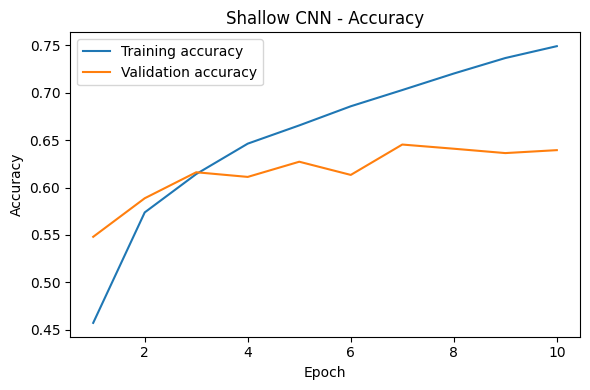

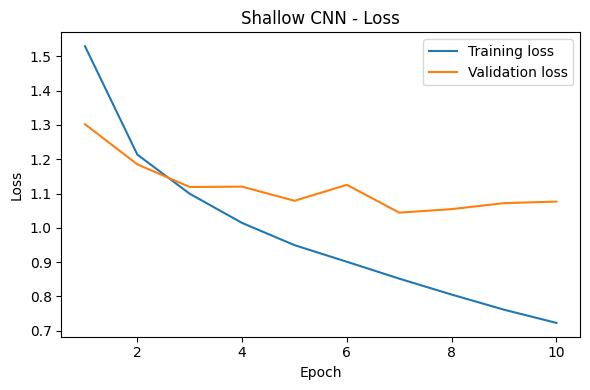

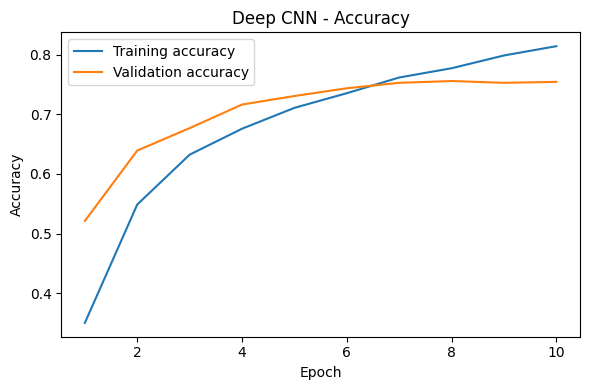

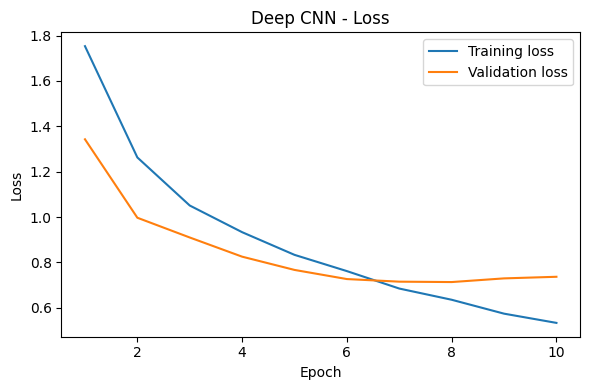

In [25]:
plot_training_history(history_shallow, title_prefix="Shallow CNN")
plot_training_history(history_deep, title_prefix="Deep CNN")


In [26]:
test_loss_shallow, test_acc_shallow = shallow_model.evaluate(x_test, y_test, verbose=0)
test_loss_deep, test_acc_deep = deep_model.evaluate(x_test, y_test, verbose=0)

print(f"Shallow CNN - Test accuracy: {test_acc_shallow:.4f}, Test loss: {test_loss_shallow:.4f}")
print(f"Deep CNN    - Test accuracy: {test_acc_deep:.4f}, Test loss: {test_loss_deep:.4f}")


Shallow CNN - Test accuracy: 0.6357, Test loss: 1.0826
Deep CNN    - Test accuracy: 0.7542, Test loss: 0.7568


<Figure size 800x800 with 0 Axes>

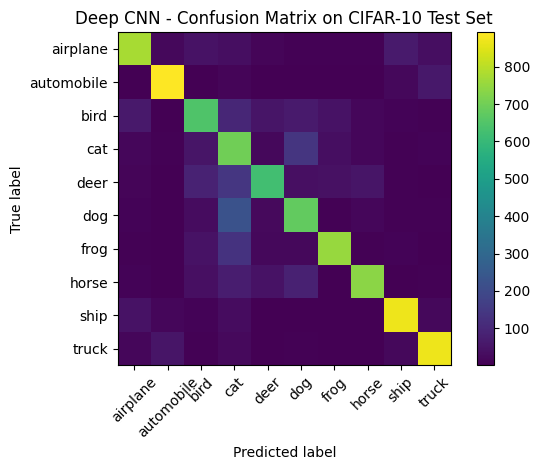

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict class probabilities on the test set using the deep CNN
y_prob_deep = deep_model.predict(x_test, verbose=0)

# Convert probabilities to class labels
y_pred_deep = np.argmax(y_prob_deep, axis=1)

# True labels
y_true = y_test.flatten()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_deep)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

plt.figure(figsize=(8, 8))
disp.plot(include_values=False, xticks_rotation=45)
plt.title("Deep CNN - Confusion Matrix on CIFAR-10 Test Set")
plt.tight_layout()
plt.show()


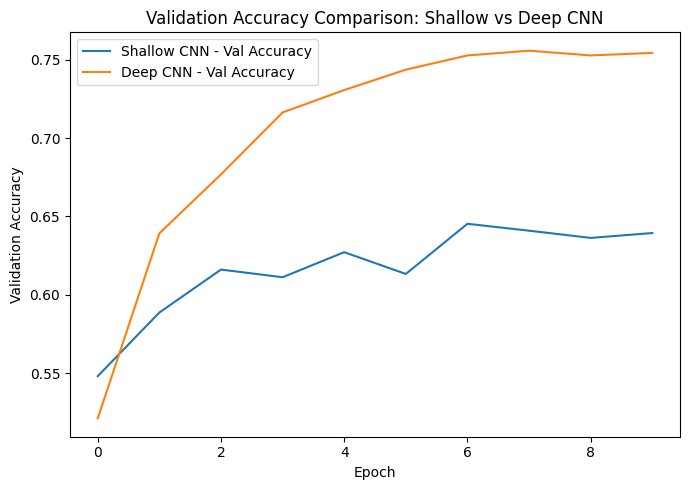

In [28]:
plt.figure(figsize=(7, 5))

plt.plot(history_shallow.history["val_accuracy"], label="Shallow CNN - Val Accuracy")
plt.plot(history_deep.history["val_accuracy"], label="Deep CNN - Val Accuracy")

plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Comparison: Shallow vs Deep CNN")
plt.legend()
plt.tight_layout()
plt.show()


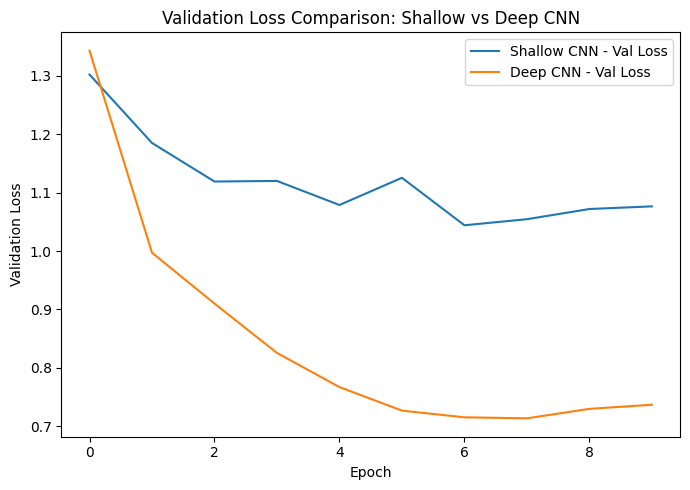

In [29]:
plt.figure(figsize=(7, 5))

plt.plot(history_shallow.history["val_loss"], label="Shallow CNN - Val Loss")
plt.plot(history_deep.history["val_loss"], label="Deep CNN - Val Loss")

plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.title("Validation Loss Comparison: Shallow vs Deep CNN")
plt.legend()
plt.tight_layout()
plt.show()


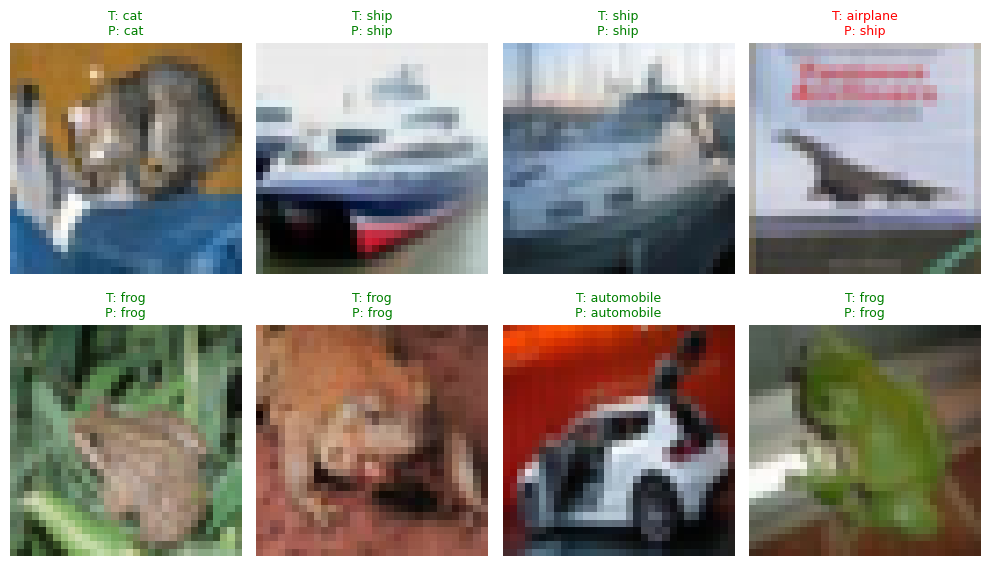

In [30]:
# Show some correct and incorrect predictions from the deep model
plt.figure(figsize=(10, 6))

for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(x_test[i])
    
    true_label = class_names[y_test[i][0]]
    pred_label = class_names[y_pred_deep[i]]
    
    title_color = "green" if true_label == pred_label else "red"
    plt.title(f"T: {true_label}\nP: {pred_label}", color=title_color, fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [32]:
shallow_model.save("shallow_cnn_model.keras")
deep_model.save("deep_cnn_model.keras")


In [33]:
import pickle

with open("history_shallow.pkl", "wb") as f:
    pickle.dump(history_shallow.history, f)

with open("history_deep.pkl", "wb") as f:
    pickle.dump(history_deep.history, f)
